<a href="https://colab.research.google.com/github/jaeohshin/pytorch_sklearn/blob/main/ch12_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
torch.manual_seed(1)
t = torch.rand(5)
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


In [ ]:
t_splits = torch.split(t, split_size_or_sections=[3, 2])

In [ ]:
[item.numpy() for item in t_splits]

[array([0.7576316 , 0.27931088, 0.40306926], dtype=float32),
 array([0.73468447, 0.02928156], dtype=float32)]

In [ ]:
A = torch.ones(3)
B = torch.zeros(3)
C = torch.cat([A, B], axis = 0)

In [ ]:
print(A)
print(B)
#print(C)

tensor([1., 1., 1.])
tensor([0., 0., 0.])


In [ ]:
D = torch.stack([A, B], axis = 0)
print(D)
E = torch.stack([A, B], axis = 1)
print(E)

tensor([[1., 1., 1.],
        [0., 0., 0.]])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


In [ ]:
from torch.utils.data import DataLoader
t = torch.arange(5, dtype=torch.float32)
data_loader = DataLoader(t)

In [ ]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])


In [ ]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4.])


In [ ]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
print(t_x)
print(t_y)

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])
tensor([0, 1, 2, 3])


In [ ]:
from torch.utils.data import dataset

class JointDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y


  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]


In [ ]:
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
t_z = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)

print(joint_dataset[1])

for example in joint_dataset:
  print('  x:', example[0],
        '  y:', example[1])

(tensor([0.7347, 0.0293, 0.7999]), tensor(1))
  x: tensor([0.7576, 0.2793, 0.4031])   y: tensor(0)
  x: tensor([0.7347, 0.0293, 0.7999])   y: tensor(1)
  x: tensor([0.3971, 0.7544, 0.5695])   y: tensor(2)
  x: tensor([0.4388, 0.6387, 0.5247])   y: tensor(3)


In [ ]:
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
   print('  x:', example[0],
         '  y:', example[1])

  x: tensor([0.7576, 0.2793, 0.4031])   y: tensor(0)
  x: tensor([0.7347, 0.0293, 0.7999])   y: tensor(1)
  x: tensor([0.3971, 0.7544, 0.5695])   y: tensor(2)
  x: tensor([0.4388, 0.6387, 0.5247])   y: tensor(3)


In [ ]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
   print(f'Batch {i}:', 'x:', batch[0],
         '\n         y:', batch[1],
         '\n')

for epoch in range(3):
  print(f'===Epoch {epoch+1}')
  for i, batch in enumerate(data_loader, 1):
    print(f'Batch {i}:', 'x:', batch[0],
          '\n   y:', batch[1])

Batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0]) 

Batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3]) 

===Epoch 1
Batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
   y: tensor([0, 2])
Batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
   y: tensor([1, 3])
===Epoch 2
Batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
   y: tensor([3, 2])
Batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
   y: tensor([0, 1])
===Epoch 3
Batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.4388, 0.6387, 0.5247]]) 
   y: tensor([0, 3])
Batch 2: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7347, 0.0293, 0.7999]]) 
   y: tensor([2, 1])


In [ ]:
import sys

In [ ]:
if 'google.colab' in sys.modules:
    !wget https://github.com/rickiepark/ml-with-pytorch/raw/main/ch12/cat_dog_images.tar.gz
    !tar -xvzf cat_dog_images.tar.gz

--2024-07-03 04:21:53--  https://github.com/rickiepark/ml-with-pytorch/raw/main/ch12/cat_dog_images.tar.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/cat_dog_images.tar.gz [following]
--2024-07-03 04:21:53--  https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/cat_dog_images.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965517 (943K) [application/octet-stream]
Saving to: ‘cat_dog_images.tar.gz’

cat_dog_images.tar. 100%[===================>] 942.89K  --.-KB/s    in 0.06s   

2024-07-03 04:21:53 (16.4 MB/s) - ‘cat_dog_images.ta

In [ ]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


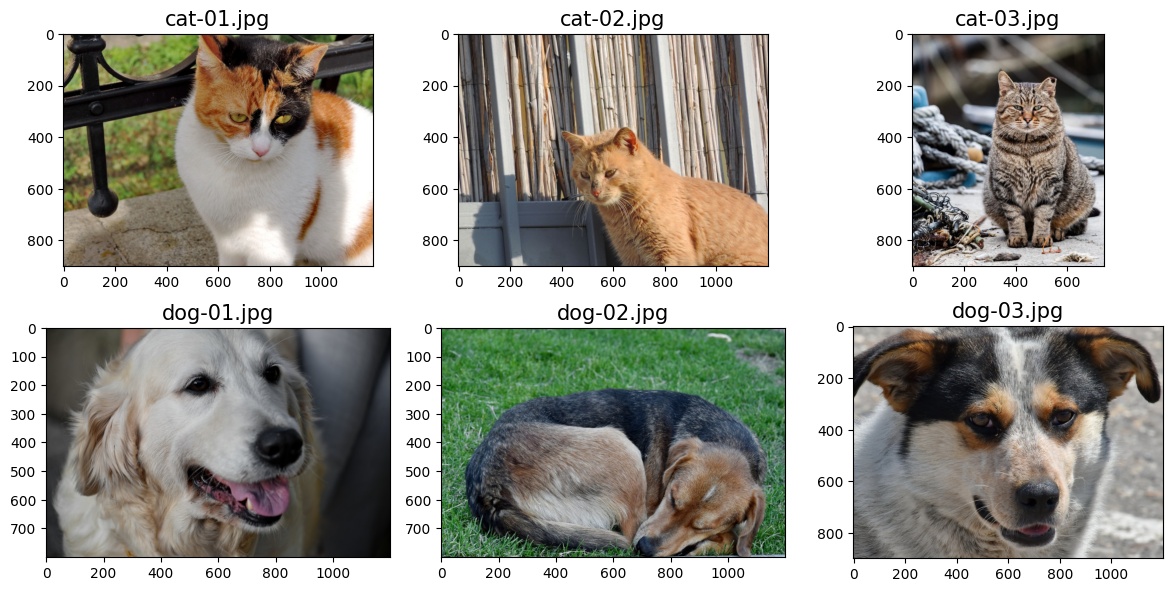

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image


fig = plt.figure(figsize=(12,6))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

In [ ]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [ ]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
      self.file_list = file_list
      self.labels = labels

    def __getitem__(self, index):
      file = self.file_list[index]
      label = self.labels[index]
      return file, label

    def __len__(self):
      return len(self.labels)

image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
     print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


In [ ]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 80, 120

transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Resize((img_height, img_width), antialias=True),
])

image_dataset = ImageDataset(file_list, labels, transform)

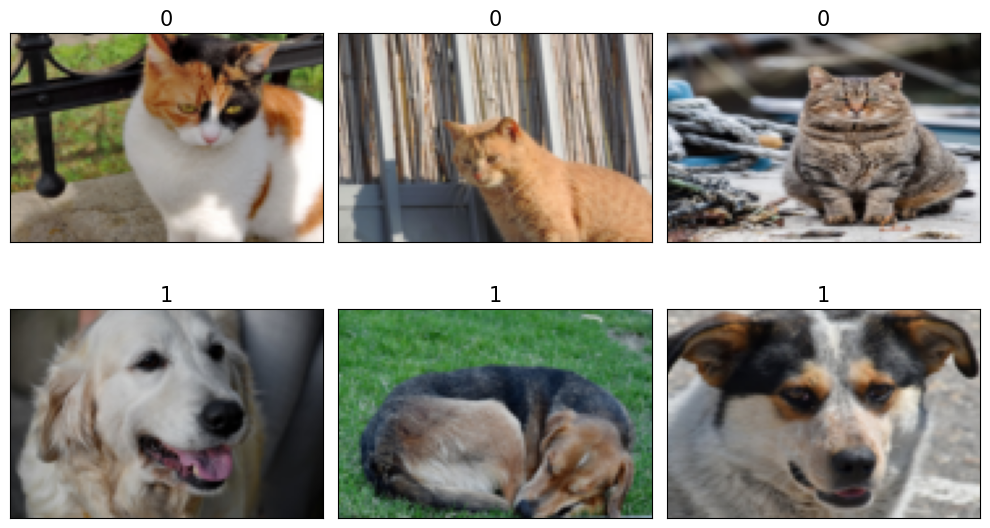

In [ ]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow((example[0].numpy().transpose((1, 2, 0))*255).astype(np.uint8))
    ax.set_title(f'{example[1]}', size=15)
plt.tight_layout()
plt.show()

In [1]:
pip install torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import torch
import numpy as np

In [3]:
import torchvision
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(
    image_path, split='train', target_type='attr', download=True
)

Downloading...
From (original): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
From (redirected): https://drive.usercontent.google.com/download?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=t&uuid=09429986-efa2-4cde-882b-04c0c4509eb4
To: /content/celeba/img_align_celeba.zip
100%|██████████| 1.44G/1.44G [00:24<00:00, 58.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pblRyaVFSWGxPY0U
To: /content/celeba/list_attr_celeba.txt
100%|██████████| 26.7M/26.7M [00:00<00:00, 86.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS
To: /content/celeba/identity_CelebA.txt
100%|██████████| 3.42M/3.42M [00:00<00:00, 148MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pbThiMVRxWXZ4dU0
To: /content/celeba/list_bbox_celeba.txt
100%|██████████| 6.08M/6.08M [00:00<00:00, 67.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pd0FJY3Blby1HUTQ
To: /content/celeba/list_landmarks_align_celeba.txt
100%

In [4]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [5]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7A30244BF880>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


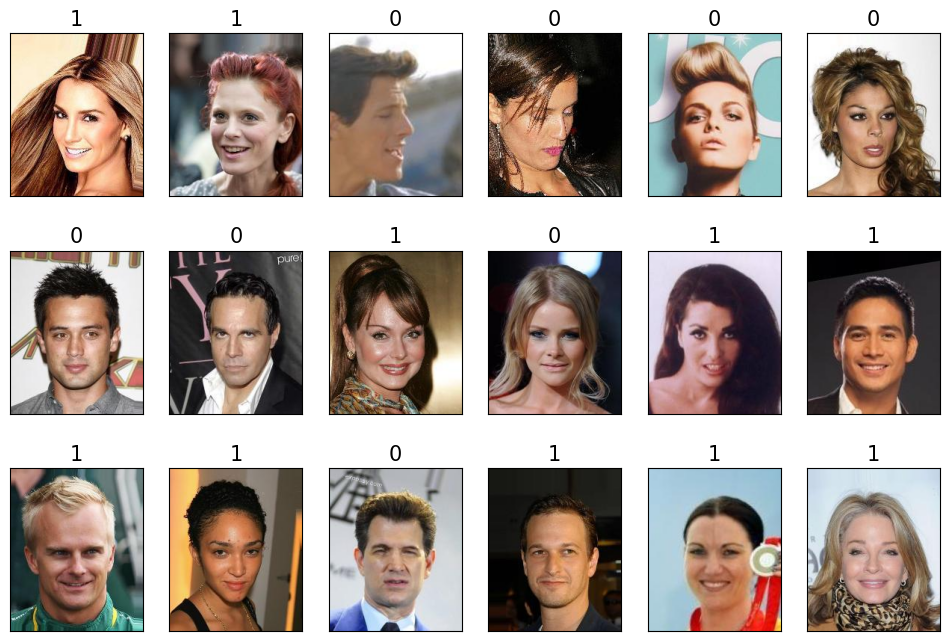

In [10]:
import matplotlib.pyplot as plt

from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)

plt.show()

In [11]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 37883715.83it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1281506.61it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9761727.94it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3046622.22it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [12]:
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

(<PIL.Image.Image image mode=L size=28x28 at 0x7A3020CCA320>, 5)


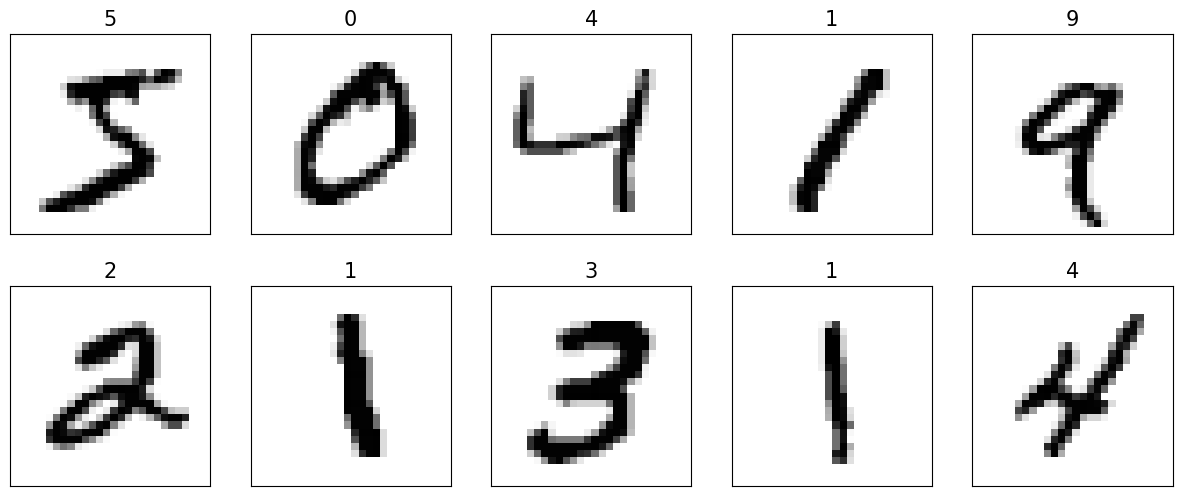

In [15]:
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

plt.show()